In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(404287, 6)

In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# distribution of duplicated and not duplicated
print(df['is_duplicate'].value_counts())

is_duplicate
0    255024
1    149263
Name: count, dtype: int64


<Axes: xlabel='is_duplicate', ylabel='count'>

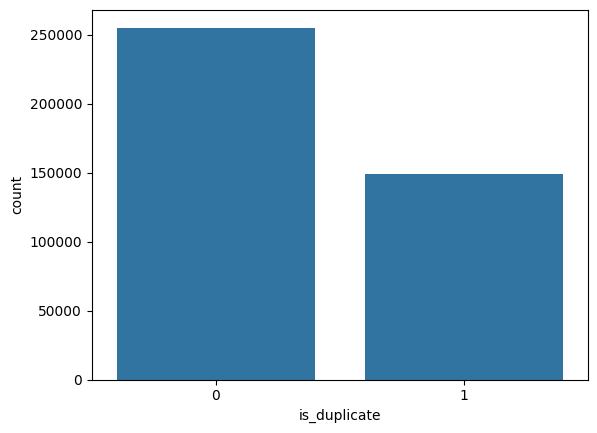

In [ ]:
sns.barplot(df['is_duplicate'].value_counts())

In [ ]:
#repeated questions

qid= pd.Series(df['qid1'].tolist()+ df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x= qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


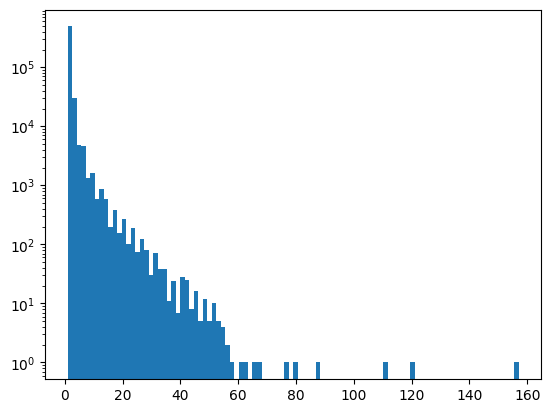

In [ ]:
#repeated question histogram

plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
new_df= df.sample(30000,random_state=42)

In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
new_df.duplicated().value_counts()

,count
False,30000


In [ ]:
print(new_df['is_duplicate'].value_counts())
print(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count()*100)

is_duplicate
0    18927
1    11073
Name: count, dtype: int64
is_duplicate
0    63.09
1    36.91
Name: count, dtype: float64


<Axes: xlabel='is_duplicate', ylabel='count'>

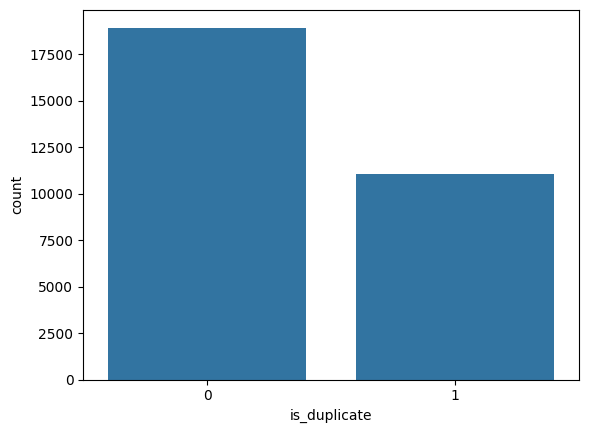

In [ ]:
sns.barplot(new_df['is_duplicate'].value_counts())

In [ ]:
#repeated questions

qid= pd.Series(new_df['qid1'].tolist()+ new_df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x= qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 55447
Number of questions getting repeated 3466


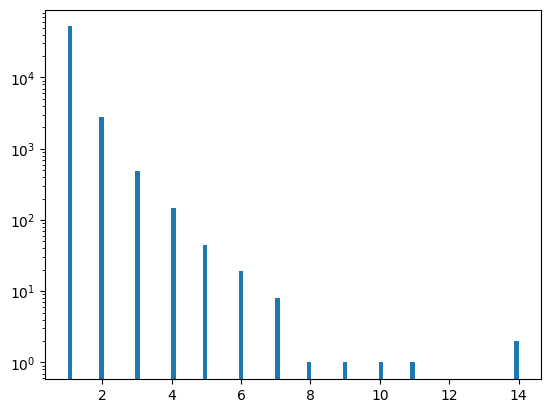

In [ ]:
#repeated question histogram

plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [ ]:
#feature engineering

new_df['q1_len']= new_df['question1'].str.len()
new_df['q2_len']= new_df['question2'].str.len()

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0,45,118
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0,48,127
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1,38,61


In [ ]:
new_df['q1_num_words']= new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']= new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11


In [ ]:
def common_words(row):
  w1= set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1&w2)

In [ ]:
new_df['common_words']= new_df.apply(common_words,axis=1)

In [ ]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1


In [ ]:
def word_total(row):
  w1= set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2= set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1)+ len(w2)

In [ ]:
new_df['total_words']= new_df.apply(word_total,axis=1)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17


In [ ]:
new_df['word_share']= round(new_df['common_words']/new_df['total_words'],2)

In [ ]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06


In [ ]:
new_df.shape

(30000, 13)

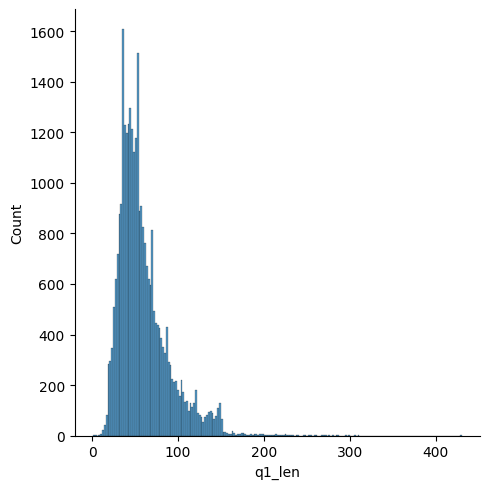

In [ ]:
#analysis of features

sns.displot(new_df['q1_len'])

In [ ]:
print('minimum characters',new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average character',int(new_df['q1_len'].mean()))

minimum characters 1
maximum characters 430
average character 59


In [ ]:
print('minimum characters',new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average character',int(new_df['q2_len'].mean()))

minimum characters 7
maximum characters 1169
average character 60


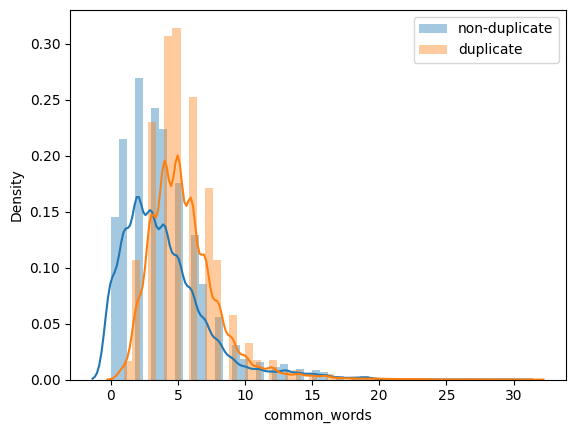

In [ ]:
#common words

sns.distplot(new_df[new_df['is_duplicate']==0]['common_words'],label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['common_words'],label='duplicate')
plt.legend()
plt.show()

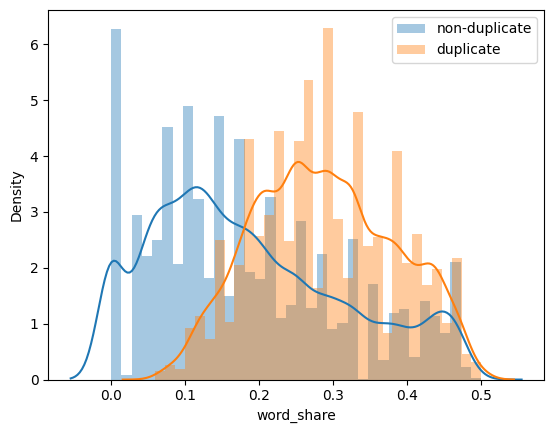

In [ ]:
#word share

sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

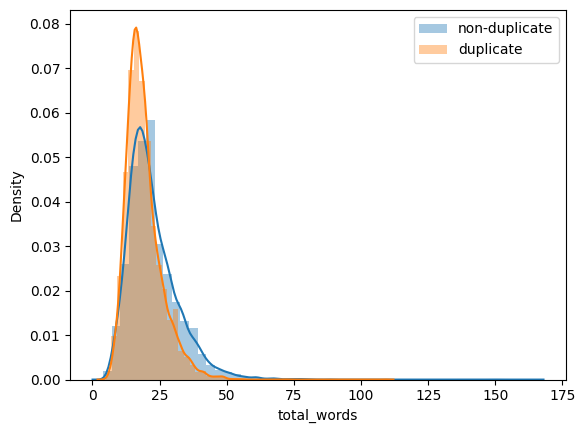

In [ ]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'],label='non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df= new_df[['question1','question2']]
ques_df.head()

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...
252452,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...
174039,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...
384863,What are some good books on marketing?,What are some of the best books ever written a...


In [ ]:
final_df= new_df.drop(columns=['id','qid1','qid2','question1','question2'],axis=1)

In [ ]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
8067,0,34,34,8,8,7,16,0.44
224279,0,40,63,7,11,1,17,0.06
252452,0,45,118,7,21,2,27,0.07
174039,0,48,127,9,20,0,27,0.00
384863,1,38,61,7,11,5,18,0.28


In [ ]:
final_df.shape

(30000, 8)

In [ ]:
questions= list(ques_df['question1'])+ list(ques_df['question2'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3000)
q1arry,q2arry= np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1= pd.DataFrame(q1arry,index= ques_df.index)
temp_df2= pd.DataFrame(q2arry,index=ques_df.index)
temp_df= pd.concat([temp_df1,temp_df2],axis=1)

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174039,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df= pd.concat([final_df,temp_df],axis=1)
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
224279,0,40,63,7,11,1,17,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
252452,0,45,118,7,21,2,27,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
174039,0,48,127,9,20,0,27,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0
384863,1,38,61,7,11,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x= final_df.drop(columns='is_duplicate',axis=1)
y= final_df['is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
from sklearn.metrics import accuracy_score

In [ ]:
rf.fit(x_train.values,y_train)
y_pred=rf.predict(x_test.values)
print(accuracy_score(y_pred,y_test))